<a href="https://colab.research.google.com/github/bubulubii/IAyRN-2024/blob/main/PIA/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Integrantes del equipo:**

*   Sebastián Cordero Leija, 1915025
*   Debanny Michelle Martínez García, 2022210
*   Sebastián Eugenio Méndez Espinosa, 2024074
*   Julián Javier Delgado Rodríguez, 2109188
*   María Fernanda Ramos Campos, 2109376

**Hora clase y frecuencia:** L, M, V. N4. Grupo 010.





# Proyecto de la clase de inteligencia Artificial y Redes Neuronales.


## Introducción
Este proyecto consistió en entrenar una Red Neuronal Convolucional, partiendo de un conjunto de datos seleccionado por nosotros, de la plataforma Kaggle. Tal conjunto quedaba a libre elección, por lo que elegimos un Dataset llamado "Images of LEGO Bricks".

Este conjunto contiene 16 tipos de bloques de LEGO distintos, todos en diferentes ángulos. Entrenamos a esta red para que sea capaz de identificar el tipo de pieza, independientemente del ángulo en que se muestre.

## Librerías
La primera parte consiste en importar librerías, así como las funciones que necesitamos utilizar.

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Preprocesamiento
En esta sección, se importan las imágenes, se reescalan y se dividen en grupo de entrenamiento y grupo de validación. Decidimos hacer una división del conjunto de datos en 80/20 para Train set y Test set respectivamente.

### *Cargar el conjunto de datos*

In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zevas02","key":"2ba5d57afd439fc0e539e8f42e79d31f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d joosthazelzet/lego-brick-images

Dataset URL: https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images
License(s): GPL-2.0
lego-brick-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path ='/content/lego-brick-images.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [17]:
imagenes = []
etiquetas = []

### *Selección de ruta y reescalamiento de imágenes*

In [18]:
carpeta_principal = '/content/Dataset/LEGO brick images v1'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.png'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (100,100), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

Se han truncado las últimas 5000 líneas del flujo de salida.
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0193.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0161.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0221.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0212.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0075.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0023.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0003.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0276.png
/content/Dataset/LEGO brick images v1/18651 Cross Axle 2M with Snap friction/201706171106-0074.png
/content/Dataset/LEGO brick images v1/18651 Cros

*Visualización de variables*

In [19]:
etiquetas = np.array(etiquetas)

In [20]:
imagenes = np.array(imagenes)

In [34]:
np.shape(imagenes)

(6379, 100, 100, 3)

In [22]:
len(etiquetas)

6379

In [23]:
etiquetas[+1]

0

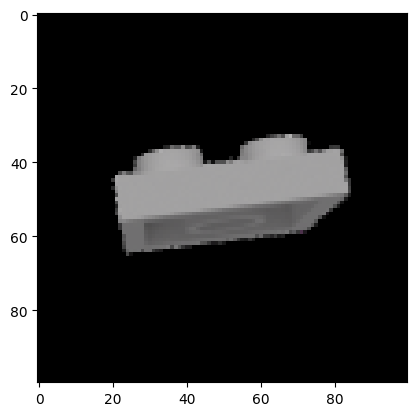

In [24]:
plt.imshow(imagenes[10])

### *División del conjunto de datos en Train y Test*


In [35]:
images_train, images_test, labels_train, labels_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [26]:
images_train, images_test = images_train / 255.0, images_test / 255.0

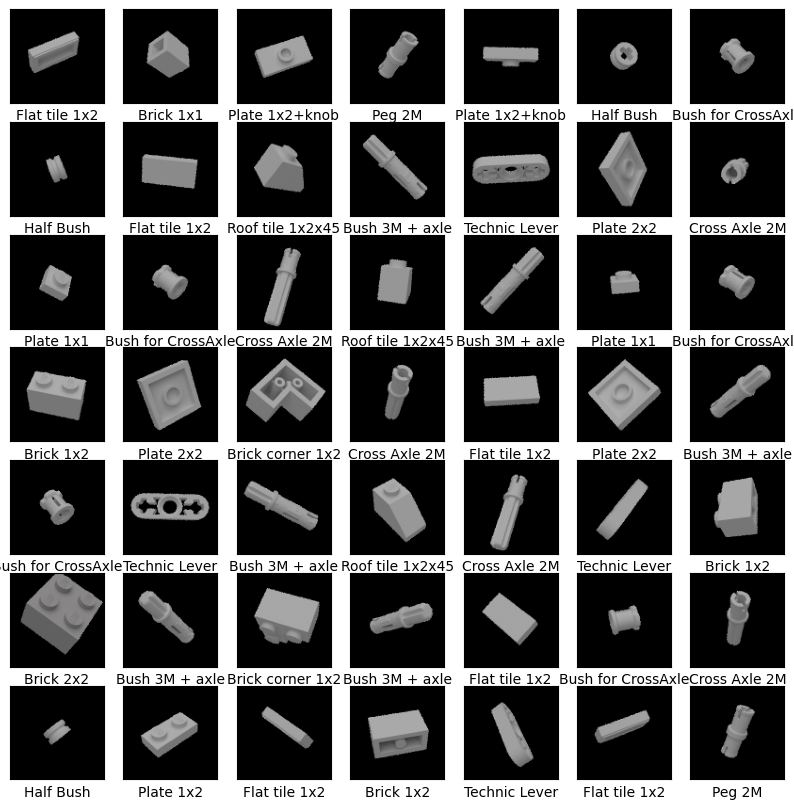

In [89]:
class_names = ['Plate 2x2', 'Peg 2M', 'Bush 3M + axle', 'Cross Axle 2M', 'Brick 1x2',
 'Plate 1x1', 'Bush for CrossAxle', 'Roof tile 1x2x45', 'Plate 1x2+knob', 'Brick corner 1x2',
 'Plate 1x2', 'Brick 1x1', 'Technic Lever', 'Half Bush', 'Brick 2x2',
 'Flat tile 1x2']

plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[labels_train[i]])
plt.show()

## Estructura y entrenamiento de RNAC
En esta sección, establecemos la cantidad de capas de convolución, así como de aprendizaje, para nuestra red neuronal artificial convolucional.


### *Parte convolucional de la RNAC*

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### *Parte de clasificación de la RNAC*

In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

### *Compilación del modelo y sus características*

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### *Entrenamiento de la RNAC*
Definimos 10 épocas de entrenamiento.

In [46]:
# Entrenamiento de la RNAC
history = model.fit(images_train, labels_train, epochs=10,
                    validation_data=(images_test, labels_test))

Epoch 1/10
160/160 [==============================] - 90s 551ms/step - loss: 2.2560 - accuracy: 0.5607 - val_loss: 0.6255 - val_accuracy: 0.7759
Epoch 2/10
160/160 [==============================] - 87s 542ms/step - loss: 0.4241 - accuracy: 0.8424 - val_loss: 0.4037 - val_accuracy: 0.8409
Epoch 3/10
160/160 [==============================] - 95s 595ms/step - loss: 0.2560 - accuracy: 0.8963 - val_loss: 0.4488 - val_accuracy: 0.8339
Epoch 4/10
160/160 [==============================] - 89s 555ms/step - loss: 0.2115 - accuracy: 0.9151 - val_loss: 0.3736 - val_accuracy: 0.8613
Epoch 5/10
160/160 [==============================] - 90s 563ms/step - loss: 0.1529 - accuracy: 0.9349 - val_loss: 0.3879 - val_accuracy: 0.8621
Epoch 6/10
160/160 [==============================] - 88s 550ms/step - loss: 0.1242 - accuracy: 0.9467 - val_loss: 0.4086 - val_accuracy: 0.8668
Epoch 7/10
160/160 [==============================] - 91s 567ms/step - loss: 0.1224 - accuracy: 0.9465 - val_loss: 0.3693 - val_ac

## Resultados de exactitud de la RNAC
A continuación, se hacen evaluaciones de exactitud del modelo para determinar la precisión. Se compara el rendimiento general con la precisión de la etapa de validación.

### *Evaluación de exactitud de Prueba*

In [47]:
#Procedemos a evaluar la exactitud del modelo, comparando rendimiento con el set de datos.

test_loss, test_acc = model.evaluate(images_test, labels_test, verbose=2)
print('\nTest accuracy:', test_acc * 100, '%')

40/40 - 7s - loss: 0.3993 - accuracy: 0.8793 - 7s/epoch - 166ms/step

Test accuracy: 87.93103694915771 %


Observamos un ligero sobreajuste, pero en general una buena precisión, que asciende al 87.93%

### *Comparación con exactitud de validación*

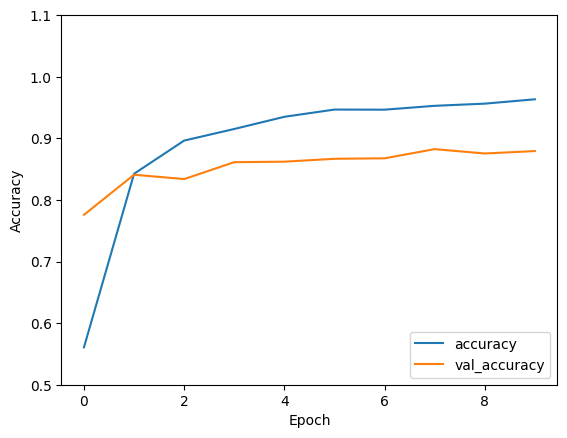

In [49]:
#Graficamos la diferencia de la exactitud contra la de la validación.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.show()

Se aprecia gráficamente el sobreajuste mencionado.

## Predicciones con la RNAC entrenada.
Se muestran 5 predicciones, de las primeras 5 imágenes, para verificar la clase identificada por la red en relación a la clase verdadera.

In [60]:
#Establecer el uso del modelo para predecir imágenes.
predictions = model.predict(images_test)


40/40 [==============================] - 7s 182ms/step


In [68]:
# Obtener el índice de la clase con mayor probabilidad para cada predicción
predicted_class = np.argmax(predictions[1])
true_class = labels_test[1]

In [90]:
# Obtener las etiquetas correspondientes a los índices
predicted_label = class_names[predicted_class]
true_label = class_names[true_class]

print("La red dice que la imagen es clase {} y la clase verdadera es: {}".format(predicted_label, true_label))

La red dice que la imagen es clase Technic Lever y la clase verdadera es: Technic Lever


In [91]:
#Finalmente, solicitamos las 5 primeras predicciones, comparando valor esperado con real.
for i in range(5):
    # Obtener el índice de la clase con mayor probabilidad para la predicción i
    predicted_class = np.argmax(predictions[i])
    true_class = labels_test[i]

    # Obtener las etiquetas correspondientes a los índices
    predicted_label = class_names[predicted_class]
    true_label = class_names[true_class]

    print("Predicción {}: La red dice que la imagen es clase '{}' y la clase verdadera es: '{}'".format(i+1, predicted_label, true_label))

Predicción 1: La red dice que la imagen es clase 'Roof tile 1x2x45' y la clase verdadera es: 'Roof tile 1x2x45'
Predicción 2: La red dice que la imagen es clase 'Flat tile 1x2' y la clase verdadera es: 'Flat tile 1x2'
Predicción 3: La red dice que la imagen es clase 'Plate 1x1' y la clase verdadera es: 'Plate 1x1'
Predicción 4: La red dice que la imagen es clase 'Bush 3M + axle' y la clase verdadera es: 'Bush 3M + axle'
Predicción 5: La red dice que la imagen es clase 'Technic Lever' y la clase verdadera es: 'Technic Lever'


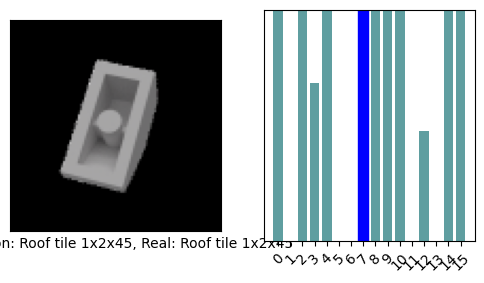

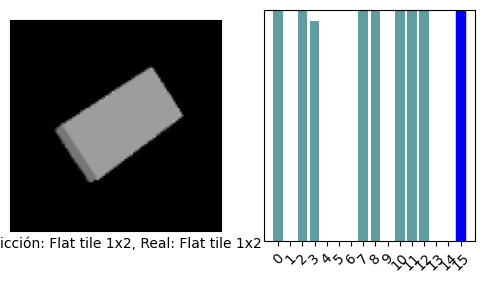

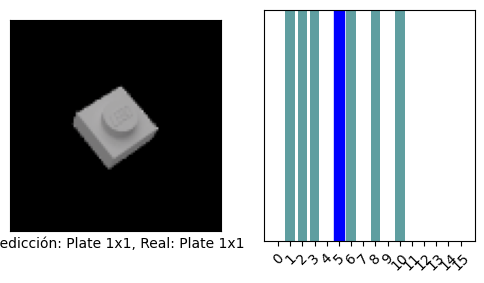

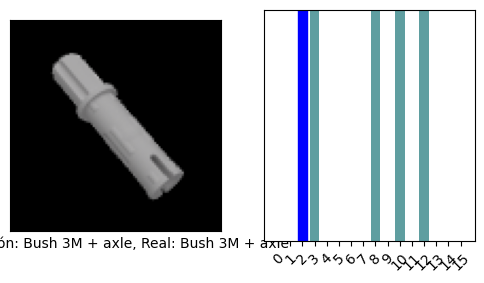

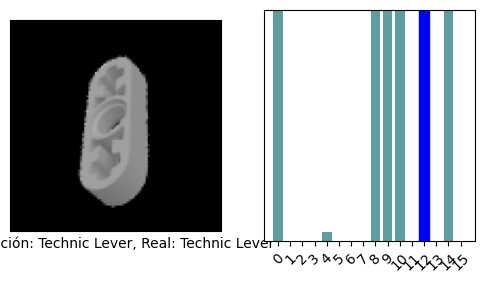

In [92]:
# Iterar sobre las primeras cinco predicciones
for i in range(5):
    # Obtener el índice de la clase con mayor probabilidad para la predicción i
    predicted_class = np.argmax(predictions[i])
    true_class = labels_test[i]

    # Obtener las etiquetas correspondientes a los índices
    predicted_label = class_names[predicted_class]
    true_label = class_names[true_class]

    # Mostrar la imagen
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_test[i], cmap=plt.cm.binary)
    plt.xlabel("Predicción: {}, Real: {}".format(predicted_label, true_label))

    # Mostrar la gráfica de barras de las predicciones
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions[i], color="#5F9EA0")
    plt.ylim([0, 1])
    plt.xticks(rotation=45)
    thisplot[predicted_class].set_color('green')
    thisplot[true_class].set_color('blue')
    plt.show()

## Referencias


1.  https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

    
2.  https://www.tensorflow.org/tutorials/images/cnn?hl=es-419

3.  https://keras.io/api/datasets/mnist/